<div style="display:fill;
            border-radius:15px;
            background-color: #15B392;
            font-size: 210%;
            padding: 20px;
            color:white;
            border-radius: 20px;
            border-style: solid;
            border-color: black;">
<b>
⚠️ Earthquake Data Analysis and Prediction </b>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
file_path = 'EarthQuakeDatabase.csv'
df = pd.read_csv(file_path)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
df.shape

(23412, 21)

# <div style="color:black;display:fill;border-radius:5px;background-color:#73EC8B;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b>1 |</b> Data Cleaning and Preprocessing</p></div>

In [5]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [6]:
df.Date.info()
df.Time.info()

<class 'pandas.core.series.Series'>
RangeIndex: 23412 entries, 0 to 23411
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
23412 non-null  object
dtypes: object(1)
memory usage: 183.0+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 23412 entries, 0 to 23411
Series name: Time
Non-Null Count  Dtype 
--------------  ----- 
23412 non-null  object
dtypes: object(1)
memory usage: 183.0+ KB


In [7]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [8]:
df.dropna(subset=['Date', 'Time'], inplace=True)

In [9]:
df.dtypes

,0
Date,object
Time,object
Latitude,float64
Longitude,float64
Type,object
Depth,float64
Depth Error,float64
Depth Seismic Stations,float64
Magnitude,float64
Magnitude Type,object


In [10]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [11]:
df.isnull().sum()

,0
Date,0
Time,0
Latitude,0
Longitude,0
Type,0
Depth,0
Depth Error,18951
Depth Seismic Stations,16315
Magnitude,0
Magnitude Type,3


In [12]:
date_column = df['Date']

# Expected date format
date_format = '%m/%d/%Y'

# List of inconsistent values
inconsistent_values = []

# Check all values in column
for index, date in date_column.items():
    try:
        # Parse date string using expected format
        pd.to_datetime(date, format=date_format)
    except ValueError:
        # If parsing fails, add value to list
        inconsistent_values.append((index, date))

print(inconsistent_values)

[(3378, '1975-02-23T02:58:41.000Z'), (7512, '1985-04-28T02:53:41.530Z'), (20650, '2011-03-13T02:23:34.520Z')]


In [13]:
# Enter new date format
df.loc[3378, 'Date'] = '02/23/1975'
df.loc[7512, 'Date'] = '04/28/1985'
df.loc[20650, 'Date'] = '03/13/2011'

In [14]:
df.loc[[3378, 7512, 20650], 'Date']

,Date
3378,02/23/1975
7512,04/28/1985
20650,03/13/2011


In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Date'].dtype

dtype('<M8[ns]')

In [16]:
df['Year'] = df['Date'].dt.year
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year
0,1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1,1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
2,1965-01-05,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
3,1965-01-08,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
4,1965-01-09,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965


In [17]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# <div style="color:black;display:fill;border-radius:5px;background-color:#73EC8B;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b>2 |</b> Exploratory Data Analysis</p></div>

In [18]:
df.describe()

,Date,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,Year
count,23412,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000,23412.000000
mean,1993-02-17 21:29:07.411583744,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784,1992.632411
min,1965-01-02 00:00:00,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000,1965.000000
25%,1981-04-10 18:00:00,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000,1981.000000
50%,1993-11-30 00:00:00,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000,1993.000000
75%,2005-09-09 06:00:00,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000,2005.000000
max,2016-12-30 00:00:00,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000,2016.000000
std,NaN,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545,14.426100


### <div style="color: black;display: inline-block;border-radius: 5px;background-color: #D2FF72;font-size: 100%font-weight: bold;letter-spacing: 0.5px; padding: 10px;">Correlation Heatmap</div>

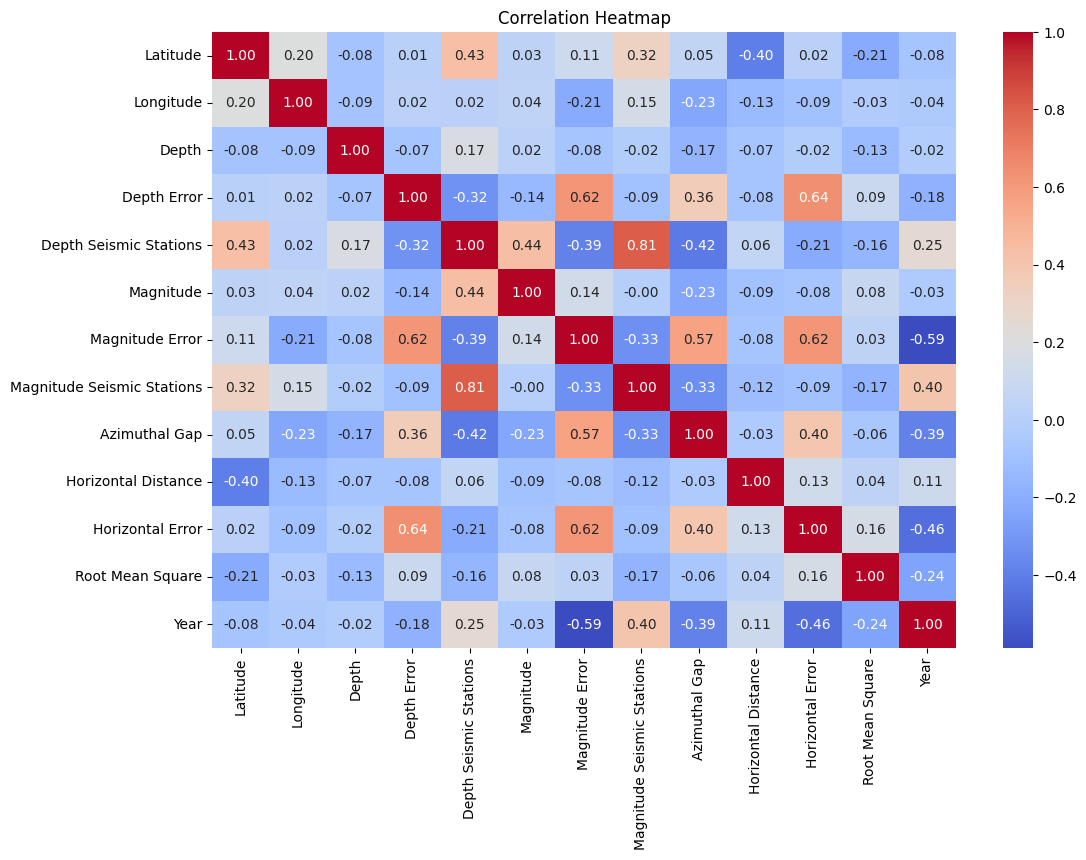

In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### <div style="color: black;display: inline-block;border-radius: 5px;background-color: #D2FF72;font-size: 100%font-weight: bold;letter-spacing: 0.5px;padding: 10px;">Magnitude Distribution
</div>

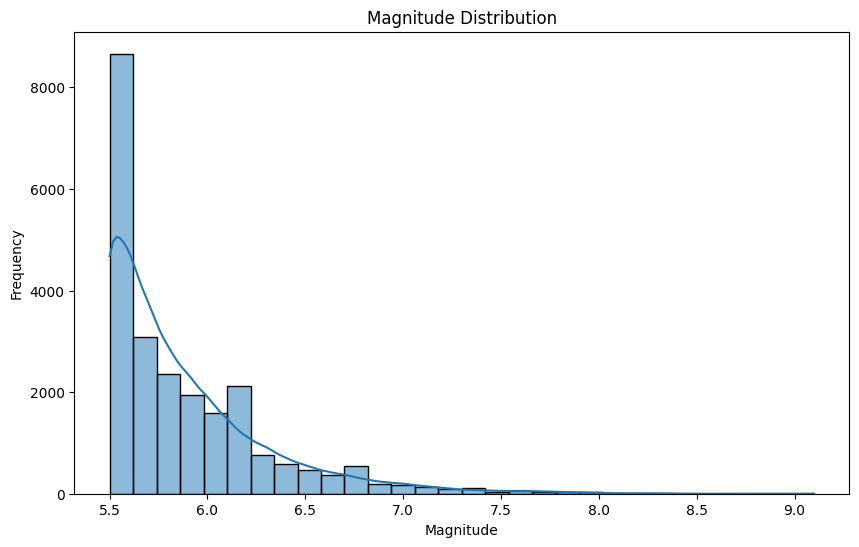

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Magnitude'], bins=30, kde=True)
plt.title('Magnitude Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

### <div style="color: black;display: inline-block;border-radius: 5px;background-color: #D2FF72;font-size: 100%font-weight: bold;letter-spacing: 0.5px;padding: 10px;">Day of the month
</div>

In [22]:
day_of_month_earthquakes = df['Date'].dt.day
print(day_of_month_earthquakes.head())

0    2
1    4
2    5
3    8
4    9
Name: Date, dtype: int32


<Axes: xlabel='Date', ylabel='Count'>

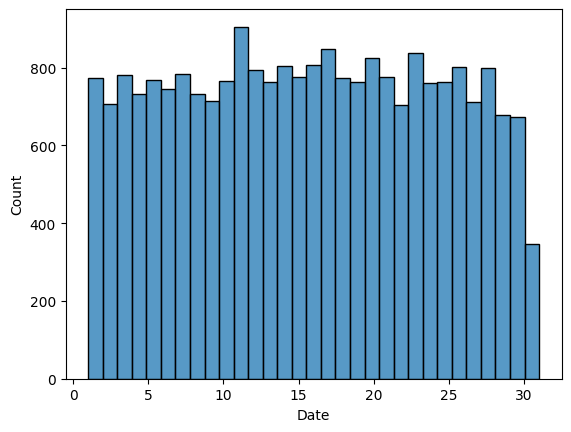

In [23]:
day_of_month_earthquakes = day_of_month_earthquakes.dropna()
sns.histplot(day_of_month_earthquakes, kde = False, bins = 31)

### <div style="color: black;display: inline-block;border-radius: 5px;background-color: #D2FF72;font-size: 100%font-weight: bold;letter-spacing: 0.5px;padding: 10px;">Types
</div>

In [24]:
df['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

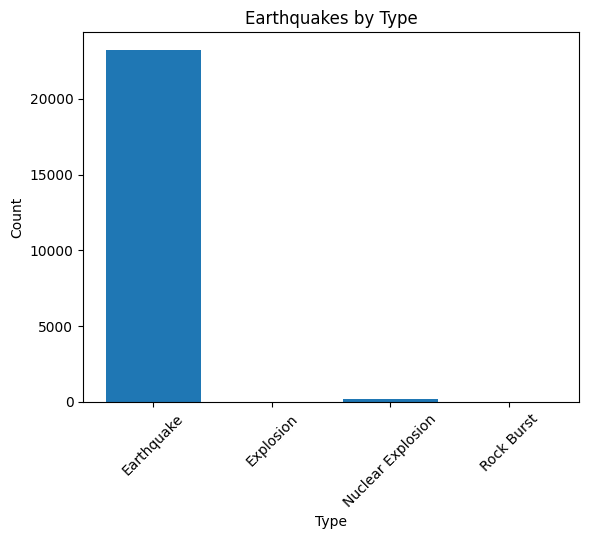

In [25]:
grouped_data = df.groupby('Type').size().reset_index(name='Count')

plt.bar(grouped_data['Type'], grouped_data['Count'])
plt.title('Earthquakes by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### <div style="color: black;display: inline-block;border-radius: 5px;background-color: #D2FF72;font-size: 100%font-weight: bold;letter-spacing: 0.5px;padding: 10px;">By year
</div>

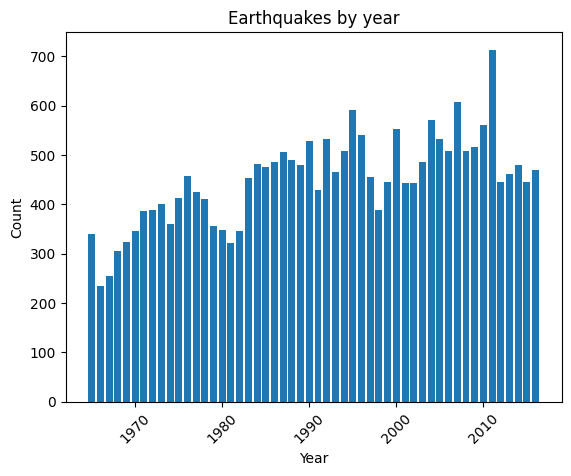

In [26]:
grouped_data = df.groupby('Year').size().reset_index(name='Count')

plt.bar(grouped_data['Year'], grouped_data['Count'])
plt.title('Earthquakes by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### <div style="color: black;display: inline-block;border-radius: 5px;background-color: #D2FF72;font-size: 100%font-weight: bold;letter-spacing: 0.5px;padding: 10px;">By depth
</div>

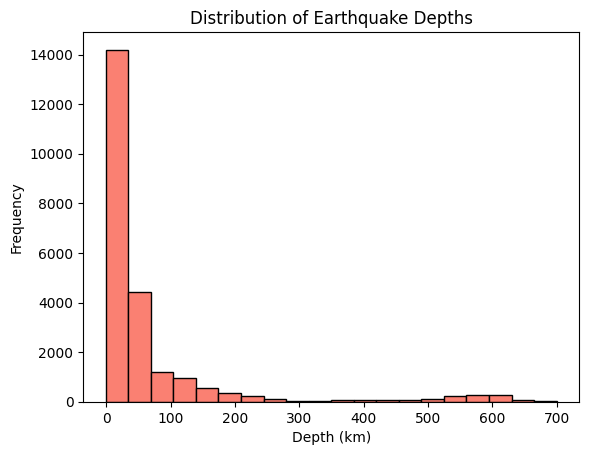

In [32]:
plt.hist(df['Depth'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

### <div style="color: black;display: inline-block;border-radius: 5px;background-color: #D2FF72;font-size: 100%font-weight: bold;letter-spacing: 0.5px;padding: 10px;">Magnitude vs Depth
</div>

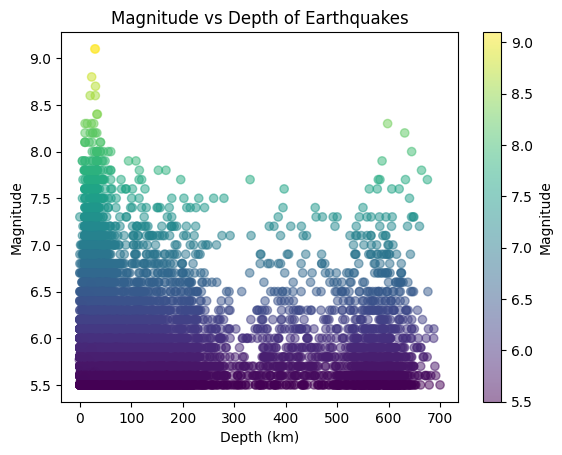

In [33]:
plt.scatter(df['Depth'], df['Magnitude'], alpha=0.5, c=df['Magnitude'], cmap='viridis')
plt.title('Magnitude vs Depth of Earthquakes')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.colorbar(label='Magnitude')
plt.show()

### <div style="color: black;display: inline-block;border-radius: 5px;background-color: #D2FF72;font-size: 100%font-weight: bold;letter-spacing: 0.5px;padding: 10px;">Geographical Distribution of Earthquakes
</div>

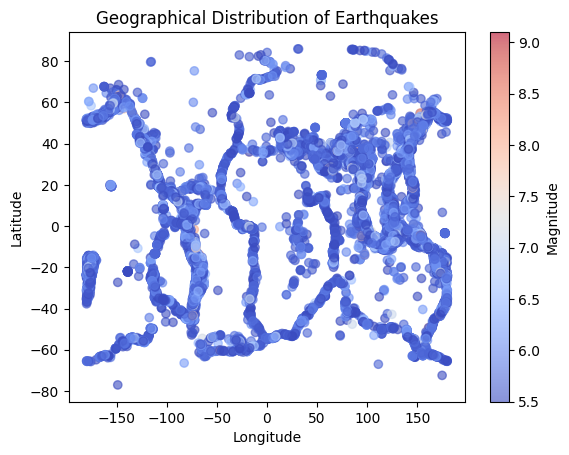

In [34]:
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.6, c=df['Magnitude'], cmap='coolwarm')
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Magnitude')
plt.show()

### <div style="color: black;display: inline-block;border-radius: 5px;background-color: #D2FF72;font-size: 100%font-weight: bold;letter-spacing: 0.5px;padding: 10px;">Number of Earthquakes Over Time
</div>

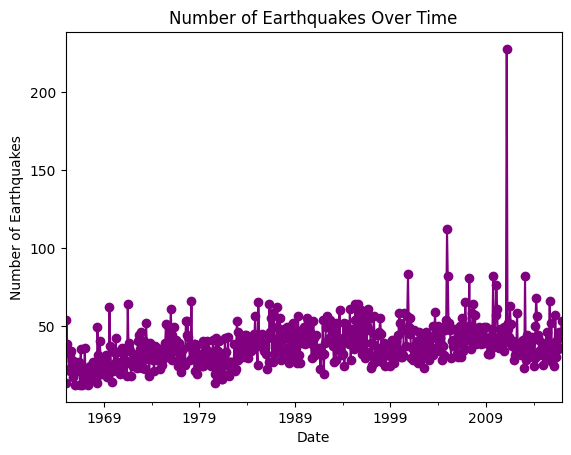

In [35]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot number of earthquakes over time
df.groupby(df['Date'].dt.to_period('M')).size().plot(kind='line', marker='o', color='purple')
plt.title('Number of Earthquakes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.show()

# <div style="color:black;display:fill;border-radius:5px;background-color:#73EC8B;overflow:hidden"><p style="padding:15px;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b>3 |</b> Predicting Earthquake Type</p></div>

In [36]:
features = ['Latitude', 'Longitude', 'Depth', 'Magnitude']
X = df[features]
y = df['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9997152619589977

### <div style="color: black;display: inline-block;border-radius: 5px;background-color: #D2FF72;font-size: 100%font-weight: bold;letter-spacing: 0.5px;padding: 10px;">Classification Report
</div>

In [ ]:
print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

       Earthquake       1.00      1.00      1.00      6976
        Explosion       0.00      0.00      0.00         1
Nuclear Explosion       0.96      1.00      0.98        47

         accuracy                           1.00      7024
        macro avg       0.65      0.67      0.66      7024
     weighted avg       1.00      1.00      1.00      7024

